# Shark Attacks

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import datetime as dt
import awoc
import calendar

In [2]:
shark_atck_df = pd.read_csv('attacks.csv', encoding='latin-1')
shark_atck_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
shark_atck_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

The dataframe has a total of 25723 entries and 24 columns. All of the columns have more than 17,000 null values. Checking all the columns' names, I can deduce that not all of them will be useful for my research. Let's select the ones that will be, and generate a new dataframe with them:

 - Case Number, Date, Year, Case Number 1 & 2: checking the sample above I can see that every of those columns is related with the date the attack took place. The one with more non-null values is 'Case Number', with 8702. I would like to check if this column covers the rest (if some dates are not in 'Case Number' but in other column).

In [4]:
dates = shark_atck_df.iloc[:,[0,1,2,19,20]]
sns.heatmap(dates.isnull(), cbar=False)

As the heatmap shows, all the dates in the rest of the columns and beyond are covered by 'Case Number', so I will use that column as date.

 - Time: with nearly 3000 non-nulls, I will keep it as it could be usefull.
 - Country: more than 5700 rows with all this information covered. The 'Country' column will be the main source related with this information.
 - Sex, Age: more than 5700 non-null values for sex; more than 3400 for Age.
 - Activity: what the person attacked was doing when the attack happened. There are more than 5700 non-nulls.
 - Type: the type of attack, there are nearly 6300 non-null values.
 - Injury & Fatal: the kind of injury and if it was rather fatal or not. Nearly 6300 non-null entries for the injuries; more than 5700 for the 'Fatal' column.

Let's create the new dataframe with the selected columns sorted, and change the name of 'Case Number' to 'Date'.

In [5]:
attacks_df = shark_atck_df.iloc[:,[0,13,4,9,10,7,3,12]]
attacks_df.rename(columns={'Case Number': 'Date'}, inplace=True)
attacks_df.head()

,Date,Time,Country,Area,Sex,Age,Activity,Type,Fatal (Y/N)
0,2018.06.25,18h00,USA,California,F,57,Paddling,Boating,N
1,2018.06.18,14h00 -15h00,USA,Georgia,F,11,Standing,Unprovoked,N
2,2018.06.09,07h45,USA,Hawaii,M,48,Surfing,Invalid,N
3,2018.06.08,NaN,AUSTRALIA,New South Wales,M,NaN,Surfing,Unprovoked,N
4,2018.06.04,NaN,MEXICO,Colima,M,NaN,Free diving,Provoked,N


Now let's see through a heatmap how is the distribution of the non-null values in our new dataframe, in order to see how many rows have all its values as null:

In [6]:
sns.heatmap(attacks_df.isnull(), cbar=False)

In [7]:
attacks_df.count().sort_values(ascending=False)

Date           8702
Type           6298
Country        6252
Area           5847
Fatal (Y/N)    5763
Activity       5758
Sex            5737
Age            3471
Time           2948
dtype: int64

As the heatmap shows, 2/3 of the dataframe has all its rows filled with null values in absolutely all its columns. Of course, all this rows will be deleted. Of the reminder third, at least 1/4 has just the 'Date' column filled, so I will also dump all those values and create a separate series with all the dates, just in case I want to perform a historical of shark attacks throught the years or something similar. 

In order to attemp the dataframe, I will keep those rows where the values in the column 'Type' are non-null, as it is the column with the largest number of those after 'Date'. This will let me with a 6298-row dataframe.

In [8]:
dates_s = attacks_df['Date'].dropna() #Series with all the dates
attacks_df.dropna(how='all', subset=['Type'], inplace=True) #Dataframe
attacks_df

,Date,Time,Country,Area,Sex,Age,Activity,Type,Fatal (Y/N)
0,2018.06.25,18h00,USA,California,F,57,Paddling,Boating,N
1,2018.06.18,14h00 -15h00,USA,Georgia,F,11,Standing,Unprovoked,N
2,2018.06.09,07h45,USA,Hawaii,M,48,Surfing,Invalid,N
3,2018.06.08,NaN,AUSTRALIA,New South Wales,M,NaN,Surfing,Unprovoked,N
4,2018.06.04,NaN,MEXICO,Colima,M,NaN,Free diving,Provoked,N
...,...,...,...,...,...,...,...,...,...
6297,ND.0005,NaN,AUSTRALIA,Western Australia,M,NaN,Diving,Unprovoked,Y
6298,ND.0004,NaN,AUSTRALIA,Western Australia,M,NaN,Pearl diving,Unprovoked,Y
6299,ND.0003,NaN,USA,North Carolina,M,NaN,Swimming,Unprovoked,Y
6300,ND.0002,NaN,PANAMA,NaN,M,NaN,NaN,Unprovoked,Y


## Standardizing Date column

Checking column by column, the first possible problem we can see is the format of the 'Date' column. As it can be seen with the value_counts() function, some dates have letters, marks or other characters like '.', '/' or similar. I should remove every character that is not numerical from the date, so afterwards I can get year, month and day from the reminder values. 

As it is shown above, the dates are collected, in general, with the format 'YYYY.MM.DD' as a string. So, what I can do is slice that string with indexes and then assign those to the column 'Year', 'Month' or 'Day'. Let's perform the operation.

In [9]:
attacks_df['Date'] = [re.sub(r"[A-Za-z.,&-/ ]", "", str(x)) for x in attacks_df['Date']]
attacks_df['Date']

0       20180625
1       20180618
2       20180609
3       20180608
4       20180604
          ...   
6297        0005
6298        0004
6299        0003
6300        0002
6301        0001
Name: Date, Length: 6298, dtype: object

Checking the reminder strings, we can see there are some cases where the expected format is not fulfilled (strngs are either bigger or smaller). Those are just a few cases, so checking them more in detail, we can see that, in cases where the lenght of the string is larger, there is just one more number at the end that should be removed; whilst in cases where the string is shorter, there is just one date that probably is missing its day, while the others seem to be cases named with a different nomenclature.

In [10]:
fechas_m = [x for x in attacks_df['Date'] if len(x) > 8]
fechas_l = [x for x in attacks_df['Date'] if len(x) < 8]
print(fechas_m)
print(fechas_l)

['200206132', '200206131', '186300004', '186300003', '186300002']
['', '186405', '0154', '0153', '0152', '0151', '0150', '0149', '0148', '1940', '0139', '0138', '0136', '0135', '0134', '0133', '0132', '0130', '0129', '0127', '0124', '0123', '0122', '0119', '0118', '0116', '0115', '0114', '0113', '0111', '0110', '0109', '0108', '0107', '0106', '0104', '0102', '0100', '0097', '0096', '0095', '0094', '0093', '0091', '0090', '0089', '0088', '0087', '0086', '0085', '0084', '0083', '0082', '0081', '0078', '0076', '0075', '0074', '0073', '0069', '0068', '0066', '0065', '0064', '0063', '0062', '0060', '0059', '0058', '0057', '0056', '0055', '0054', '0053', '0052', '0051', '0049', '0048', '0047', '0046', '0044', '0043', '0042', '0041', '0040', '0039', '0038', '0037', '0036', '0035', '0034', '0033', '0032', '0031', '0030', '0028', '0027', '0026', '0025', '0024', '0023', '0022', '0021', '0020', '0019', '0018', '0017', '0016', '0015', '0014', '0013', '0012', '0011', '0010', '0009', '0008', '0007',

Let's try to fix the larger dates and discover more about the shorter

In [11]:
attacks_df['Date'] = [x[:8] if len(x) > 8 else x for x in attacks_df['Date']]
[x for x in attacks_df['Date'] if len(x) > 8]

[]

### Shorter date strings

In order to check on those date that does not accomplish with the standards, I will create a new dataframe with all the columns that where related with the date of the attack in the original dataframe. These are 'Case Number', 'Date', 'Year', 'Case Number.1' and 'Case Number.2'. I will also dump the null values and standarize the strings in 'Case Number', as I done in 'attacks_df', in order to get the correlative rows so I can merge data after this analysis if necessary.

In [12]:
dates = shark_atck_df.iloc[:,[0,1,2,19,20]]

In [13]:
dates.replace('nan', np.NaN, inplace=True)
dates.replace(np.nan, np.NaN, inplace=True)
dates.replace('0', np.NaN, inplace=True)
dates.replace(0.0, np.NaN, inplace=True)
dates.replace('xx', np.NaN, inplace=True)

In [14]:
dates.dropna(how='all', inplace=True)

In [15]:
dates['Case Number'] = [re.sub(r"[A-Za-z.,&-/ ]", "", str(x)) for x in dates['Case Number']]
dates

,Case Number,Date,Year,Case Number.1,Case Number.2
0,20180625,25-Jun-2018,2018.0,2018.06.25,2018.06.25
1,20180618,18-Jun-2018,2018.0,2018.06.18,2018.06.18
2,20180609,09-Jun-2018,2018.0,2018.06.09,2018.06.09
3,20180608,08-Jun-2018,2018.0,2018.06.08,2018.06.08
4,20180604,04-Jun-2018,2018.0,2018.06.04,2018.06.04
...,...,...,...,...,...
6297,0005,Before 1903,NaN,ND.0005,ND.0005
6298,0004,Before 1903,NaN,ND.0004,ND.0004
6299,0003,1900-1905,NaN,ND.0003,ND.0003
6300,0002,1883-1889,NaN,ND.0002,ND.0002


As we can see, 'dates' dataframe has the same number of rows of 'attacks_df', and the indexes correspond to the same values; so this new dataframe could be merged with no problems to 'attacks_df' in case we need it. Now, let's select all those rows where the string in the column 'Case Number' has a lenght shorter than 8 characters, and see if the rest of the columns could give us any clue about the dates of them.

In [16]:
dates_short = dates[dates['Case Number'].str.len() < 8]
dates_short.head(15)

,Case Number,Date,Year,Case Number.1,Case Number.2
5488,,Reported 06-Sep-1905,1905.0,1905.09.06.R,1905.09.06.R
5944,186405,May-1864,1864.0,1864.05.00,1864.05.00
6181,0154,Before 1939,NaN,ND-0154,ND-0154
6182,0153,1990 or 1991,NaN,ND-0153,ND-0153
6183,0152,Before 2016,NaN,ND-0152,ND-0152
6184,0151,Before Oct-2009,NaN,ND-0151,ND-0151
6185,0150,Before 1934,NaN,ND-0150,ND-0150
6186,0149,Before 1934,NaN,ND-0149,ND-0149
6187,0148,2009?,NaN,ND-0148,ND-0148
6188,1940,Before 1930,NaN,ND-1940,ND-1940


Showing a few rows that accomplish that condition, I can see there are two on top that have a more completed date; and also that the 'Date' column has the years of the attack (or the range of years where the attack possibly took place) for some other rows, but nothing else. Let's keep just the year (or the last in the ranges), append to it a '0000' to complete the date and put the values in a new column.

In [17]:
dates_short['Date'] = [re.sub(r"[A-Za-z.,&-/ ?]", "", str(x)) for x in dates_short['Date']]
dates_short = dates_short[dates_short['Date'].str.len() >= 4]
dates_short['Case Number'] = [x[-4:]+'0000' for x in dates_short['Date']]

In [18]:
dates_short.head()

,Case Number,Date,Year,Case Number.1,Case Number.2
5488,19050000,061905,1905.0,1905.09.06.R,1905.09.06.R
5944,18640000,1864,1864.0,1864.05.00,1864.05.00
6181,19390000,1939,NaN,ND-0154,ND-0154
6182,19910000,19901991,NaN,ND-0153,ND-0153
6183,20160000,2016,NaN,ND-0152,ND-0152


Now 'Case Number' column has all the years in the same format as it is in 'attacks_df'. As we know more details about the two dates on top of the dataframe, let's also change them, so we get more information about those rows.

In [19]:
dates_short['Case Number'][5488] = '19050906'
dates_short['Case Number'][5944] = '18640500'

In [20]:
dates_short.tail()

,Case Number,Date,Year,Case Number.1,Case Number.2
6297,19030000,1903,NaN,ND.0005,ND.0005
6298,19030000,1903,NaN,ND.0004,ND.0004
6299,19050000,19001905,NaN,ND.0003,ND.0003
6300,18890000,18831889,NaN,ND.0002,ND.0002
6301,18530000,18451853,NaN,ND.0001,ND.0001


Now that the column 'Case Number' has all the dates standarized it is ready to be merged to the general dataframe. I will do this in four steps: first append 'Case Number' from dates_short to a new column in attacks_df (general df), called 'Rest Dates'; second I will fill NaN values generated in the new column with the values of the column 'Date' in attacks_df, using the function '.fillna()'; third I will give 'Date' the value of the new column, this way now 'Date' has all the standarized value; and fourth I will drop the new column.

In [21]:
attacks_df['Rest Dates'] = dates_short['Case Number']
attacks_df['Rest Dates'].fillna(attacks_df['Date'], inplace=True)
attacks_df['Date'] = attacks_df['Rest Dates']
attacks_df = attacks_df.drop(['Rest Dates'], axis=1)

Now the dates in 'Date' are ready to be separated in three different columns: 'Year', 'Month', 'Day'.

In [22]:
attacks_df['Year'] = [x[:4] for x in attacks_df['Date']]

attacks_df['Month'] = [x[4:6] for x in attacks_df['Date']]
attacks_df['Month'].replace("00", np.NaN, regex=True, inplace=True)
attacks_df['Month'].replace("nan", np.NaN, regex=True, inplace=True)
attacks_df['Month'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)

attacks_df['Day'] = [x[6:8] for x in attacks_df['Date']]
attacks_df['Day'].replace("00", np.NaN, regex=True, inplace=True)
attacks_df['Day'].replace("nan", np.NaN, regex=True, inplace=True)
attacks_df['Day'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)

attacks_df = attacks_df.drop(['Date'], axis=1)

In [23]:
attacks_df.head()

,Time,Country,Area,Sex,Age,Activity,Type,Fatal (Y/N),Year,Month,Day
0,18h00,USA,California,F,57,Paddling,Boating,N,2018,06,25
1,14h00 -15h00,USA,Georgia,F,11,Standing,Unprovoked,N,2018,06,18
2,07h45,USA,Hawaii,M,48,Surfing,Invalid,N,2018,06,09
3,NaN,AUSTRALIA,New South Wales,M,NaN,Surfing,Unprovoked,N,2018,06,08
4,NaN,MEXICO,Colima,M,NaN,Free diving,Provoked,N,2018,06,04


## Standarizing Time column

In [24]:
attacks_df['Time'] = [re.sub(r'[ <>.,()?/-]', '', str(x)) for x in attacks_df['Time']]
attacks_df['Time'] = [re.sub(r'"', '', str(x)) for x in attacks_df['Time']]

attacks_df['Time'] = [re.sub("(awn)", "0700", str(x)) for x in attacks_df['Time']]
attacks_df['Time'] = [re.sub("(eforenoon|orning|eforeDaybreak)", "1000", str(x)) for x in attacks_df['Time']]
attacks_df['Time'] = [re.sub("(idday|aybreak|Noon|aytime|unchtime)", "1200", str(x)) for x in attacks_df['Time']]
attacks_df['Time'] = [re.sub("(fterlunch|fternoon)", "1600", str(x)) for x in attacks_df['Time']]
attacks_df['Time'] = [re.sub("(usk|unset|undown|ightfall|vening|ateafternoon)", "2000", str(x)) for x in attacks_df['Time']]
attacks_df['Time'] = [re.sub("(ight|ark)", "2200", str(x)) for x in attacks_df['Time']]
attacks_df['Time'] = [re.sub("(Midnight)", "0000", str(x)) for x in attacks_df['Time']]

attacks_df['Time'] = [re.sub(r'[A-Za-z]', '', str(x)) for x in attacks_df['Time']]

In [25]:
attacks_df['Time'] = [x[:4] for x in attacks_df['Time']]

In [26]:
attacks_df['HH'] = [x[:2] for x in attacks_df['Time']]
attacks_df['HH'].replace(r'^\s*$', np.nan, regex=True, inplace=True)

attacks_df['MM'] = [x[2:4] for x in attacks_df['Time']]
attacks_df['MM'].replace(r'^\s*$', np.nan, regex=True, inplace=True)

attacks_df = attacks_df.drop(['Time'], axis=1)

In [27]:
attacks_df.head()

,Country,Area,Sex,Age,Activity,Type,Fatal (Y/N),Year,Month,Day,HH,MM
0,USA,California,F,57,Paddling,Boating,N,2018,06,25,18,00
1,USA,Georgia,F,11,Standing,Unprovoked,N,2018,06,18,14,00
2,USA,Hawaii,M,48,Surfing,Invalid,N,2018,06,09,07,45
3,AUSTRALIA,New South Wales,M,NaN,Surfing,Unprovoked,N,2018,06,08,NaN,NaN
4,MEXICO,Colima,M,NaN,Free diving,Provoked,N,2018,06,04,NaN,NaN


In [28]:
attacks_df = attacks_df.iloc[:,[7,8,9,10,11,0,1,2,3,4,5,6]]
attacks_df.head()

,Year,Month,Day,HH,MM,Country,Area,Sex,Age,Activity,Type,Fatal (Y/N)
0,2018,06,25,18,00,USA,California,F,57,Paddling,Boating,N
1,2018,06,18,14,00,USA,Georgia,F,11,Standing,Unprovoked,N
2,2018,06,09,07,45,USA,Hawaii,M,48,Surfing,Invalid,N
3,2018,06,08,NaN,NaN,AUSTRALIA,New South Wales,M,NaN,Surfing,Unprovoked,N
4,2018,06,04,NaN,NaN,MEXICO,Colima,M,NaN,Free diving,Provoked,N


## Country column

In [29]:
attacks_df['Country'] = attacks_df['Country'].apply(lambda x: str(x).strip())
attacks_df['Country'] = attacks_df['Country'].apply(lambda x: str(x).upper())
attacks_df['Country'].replace('USA', 'UNITED STATES', inplace=True)

## Sex column

In [30]:
attacks_df['Sex '] = attacks_df['Sex '].apply(lambda x: str(x).strip())

attacks_df['Sex '].replace('nan', np.NaN, inplace=True)
attacks_df['Sex '].replace('N', np.NaN, inplace=True)
attacks_df['Sex '].replace('lli', np.NaN, inplace=True)
attacks_df['Sex '].replace('.', np.NaN, inplace=True)

## Age Column

In [31]:
attacks_df['Age'].replace('nan', np.NaN, inplace=True)

attacks_df['Age'] = [re.sub("(een)", "15", str(x)) for x in attacks_df['Age']]
attacks_df['Age'] = [re.sub("(oung)", "20", str(x)) for x in attacks_df['Age']]
attacks_df['Age'] = [re.sub("(dult)", "40", str(x)) for x in attacks_df['Age']]
attacks_df['Age'] = [re.sub("(iddle)", "60", str(x)) for x in attacks_df['Age']]
attacks_df['Age'] = [re.sub("(lder)", "80", str(x)) for x in attacks_df['Age']]

### Months, to's and or's

In [32]:
months = attacks_df[attacks_df['Age'].str.contains('months')]
age = months['Age'].str.split(' ', n=2, expand=True)
months['Age'] = pd.to_numeric(age[0]) / 12
months['Age'] = months['Age'].apply(lambda x: str(x))

In [33]:
to = attacks_df[attacks_df['Age'].str.contains('to')]
age = to['Age'].str.split(' ', n=3, expand=True)
to['Age'] = (pd.to_numeric(age[0])+pd.to_numeric(age[2])) / 2
to['Age'] = to['Age'].apply(lambda x: str(x))

In [34]:
oror = attacks_df[attacks_df['Age'].str.contains('or')]
age = oror['Age'].str.split(' ', n=3, expand=True)
oror['Age'] = (pd.to_numeric(age[0])+pd.to_numeric(age[2])) / 2
oror['Age'] = oror['Age'].apply(lambda x: str(x))

### &'s'

In [35]:
amper = attacks_df[attacks_df['Age'].str.contains('&')]
amper_x = attacks_df[attacks_df['Age'].str.contains('&')]
amper['Age'] = [re.sub(r"[,&?]", "", str(x)) for x in amper['Age']]

In [36]:
age = amper['Age'].str.split(' ', expand=True)
age.fillna(value=np.NaN, inplace=True)
age.replace(r'^\s*$', np.nan, regex=True, inplace=True)

amper['Age'] = age[0]
amper_x['Age'] = age[2]

In [37]:
amper.dropna(axis=0, how='any', subset=['Age'], inplace=True)
amper_x.dropna(axis=0, how='any', subset=['Age'], inplace=True)
amper_x.reset_index(drop= True, inplace=True)

In [38]:
amper['Age'] = amper['Age'].apply(lambda x: str(x))

amper_x['Age'] = amper_x['Age'].apply(lambda x: str(x))
amper_x['Age'].replace(r'^\s*$', np.nan, regex=True, inplace=True)

Join the last dafarames and keep amper_x

In [39]:
result = pd.concat([months, to, oror, amper])
result = result[~result.index.duplicated(keep='first')]

Last cleaning, new column, fill and standarize and join amper_x

In [40]:
attacks_df['Age'] = [re.sub(r"[A-Za-z½.,>&-/ ?]", "", str(x)) for x in attacks_df['Age']]
attacks_df['Age'] = [re.sub(r'"', '', str(x)) for x in attacks_df['Age']]

In [41]:
attacks_df['Rest Ages'] = result['Age']
attacks_df['Rest Ages'].fillna(attacks_df['Age'], inplace=True)
attacks_df['Rest Ages'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
attacks_df['Age'] = attacks_df['Rest Ages']
attacks_df = attacks_df.drop(['Rest Ages'], axis=1)

In [42]:
attacks_df = pd.concat([attacks_df, amper_x], ignore_index=True)

## Activity column

In [43]:
attacks_df

,Year,Month,Day,HH,MM,Country,Area,Sex,Age,Activity,Type,Fatal (Y/N)
0,2018,06,25,18,00,UNITED STATES,California,F,57,Paddling,Boating,N
1,2018,06,18,14,00,UNITED STATES,Georgia,F,11,Standing,Unprovoked,N
2,2018,06,09,07,45,UNITED STATES,Hawaii,M,48,Surfing,Invalid,N
3,2018,06,08,NaN,NaN,AUSTRALIA,New South Wales,M,NaN,Surfing,Unprovoked,N
4,2018,06,04,NaN,NaN,MEXICO,Colima,M,NaN,Free diving,Provoked,N
...,...,...,...,...,...,...,...,...,...,...,...,...
6310,1959,12,11,NaN,NaN,AUSTRALIA,Victoria,M,35,"Spearfishing, Smith & Walker touched shark wi...",Provoked,N
6311,1959,08,02,NaN,NaN,ITALY,Tuscany,M,19,Scuba diving,Invalid,NaN
6312,1959,01,02,08,00,MOZAMBIQUE,Maputo Province,M,26,Swimming ashore from fishing boat swamped and ...,Unprovoked,Y
6313,1947,01,14,NaN,NaN,AUSTRALIA,New South Wales,NaN,16,Rowing,Boating,N


In [44]:
attacks_df['Activity'] = attacks_df['Activity'].apply(lambda x: str(x).strip())
attacks_df['Activity'] = attacks_df['Activity'].apply(lambda x: str(x).lower())

In [45]:
kwords = {"SWIMMING": "swimming|treading|splashing|jump|ran|bath|play|river", 
          "SURFING": "surf|boarding|float|skii|paddl", 
          "FISHING": "fish|clamm|net|crab|shell|lobster|shrimp|catching|oyster", 
          "SPEARFISHING": "spearfishing|harpoon", 
          "BATHING": "wading|walking|standing", 
          "DIVING": "diving|snorkel|dive", 
          "SMALLCRAFT": "kayak|row|canoe|catamaran|raft|kormoran",
          "BOAT_SHIP": "sail|boat|shipwrek|dangling|ship|torpedo|sink|fell|overboard|yacht|vessel|submarine|disaster|freighter|uss|barque|schooner|steam|ferry|hms|liner|sank",
          "PLANE": "plane|parachute|boeing|balloon",
          "WORKING": "feed|tagging|film|setting|collect|rescue|research|exhibition",
          "STRANGE_DUMB": "photo|selfie|murder|escaping|homicide"}

del_charact = ['[a-z]', '[0-9]', '[,:;.?&()/]', '[ê]', '"', "'", ""]

In [46]:
activity = attacks_df['Activity']

for key, value in kwords.items():
    activity = [re.sub(value, key, x) for x in activity]

for char in del_charact:
    activity = [re.sub(char, "", x) for x in activity]

activity = list(map(str.lstrip, activity))
activity = [re.sub('-', " ", x) for x in activity]
activity = list(map(lambda x: x.split(' ')[0], activity))
activity = list(map(str.strip, activity))

In [47]:
attacks_df['Activity'] = activity

In [48]:
attacks_df['Activity'].value_counts()

SWIMMING               1398
SURFING                1380
FISHING                1156
                        809
DIVING                  659
BOAT_SHIP               347
BATHING                 325
SMALLCRAFT              139
WORKING                  50
STRANGE_DUMB             20
PLANE                    11
BOAT_SHIPBOAT_SHIP        8
SURFINGSURFING            5
SPEARFISHING              4
SMALLCRAFTBOAT_SHIP       2
SWIMMINGSWIMMING          1
BOAT_SHIPSURFING          1
Name: Activity, dtype: int64

In [49]:
replacers = {'BOAT_SHIPBOAT_SHIP': 'BOAT_SHIP', 'SURFINGSURFING': 'SURFING', 'SMALLCRAFTBOAT_SHIP': 'SMALLCRAFT', 'BOAT_SHIPSURFING': 'BOAT_SHIP', 'SWIMMINGSWIMMING': 'SWIMMING'}

for k, v in replacers.items():
    attacks_df['Activity'].replace(k, v, inplace=True)

attacks_df['Activity'].replace(r'^\s*$', "OTHER/NaN", regex=True, inplace=True)

In [50]:
attacks_df['Activity'].value_counts(dropna=False)

SWIMMING        1399
SURFING         1385
FISHING         1156
OTHER/NaN        809
DIVING           659
BOAT_SHIP        356
BATHING          325
SMALLCRAFT       141
WORKING           50
STRANGE_DUMB      20
PLANE             11
SPEARFISHING       4
Name: Activity, dtype: int64

## Fatal column

In [51]:
attacks_df['Fatal (Y/N)'].value_counts(dropna=False)

N          4302
Y          1389
NaN         542
UNKNOWN      71
 N            7
M             1
2017          1
y             1
N             1
Name: Fatal (Y/N), dtype: int64

In [52]:
attacks_df['Fatal (Y/N)'] = attacks_df['Fatal (Y/N)'].str.strip()
attacks_df['Fatal (Y/N)'] = attacks_df['Fatal (Y/N)'].str.upper()

In [53]:
attacks_df['Fatal (Y/N)'].value_counts(dropna=False)

N          4310
Y          1390
NaN         542
UNKNOWN      71
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [54]:
shark_atck_df[shark_atck_df['Fatal (Y/N)'] == 'M'].iloc[:,11]

285    Laceration to knee by speared shark PROVOKED I...
Name: Injury, dtype: object

In [55]:
shark_atck_df[shark_atck_df['Fatal (Y/N)'] == '2017'].iloc[:,11]

786    Lower left leg injured PROVOKED ACCIDENT
Name: Injury, dtype: object

In [56]:
replacers = {'UNKNOWN': np.NaN, '2017': 'N', 'M': np.NaN}

for k, v in replacers.items():
    attacks_df['Fatal (Y/N)'].replace(k, v, inplace=True)

In [57]:
attacks_df['Fatal (Y/N)'].value_counts(dropna=False)

N      4311
Y      1390
NaN     614
Name: Fatal (Y/N), dtype: int64

## Type column

In [58]:
attacks_df['Type'] = attacks_df['Type'].str.strip()
attacks_df['Type'] = attacks_df['Type'].str.upper()

In [59]:
attacks_df['Type'].value_counts(dropna=False)

UNPROVOKED      4600
PROVOKED         577
INVALID          551
SEA DISASTER     239
BOATING          206
BOAT             139
QUESTIONABLE       2
BOATOMG            1
Name: Type, dtype: int64

In [60]:
replacers = {'BOAT': 'BOATING', 'BOATOMG': 'BOATING'}

for k, v in replacers.items():
    attacks_df['Type'].replace(k, v, inplace=True)

In [61]:
attacks_df['Type'].value_counts(dropna=False)

UNPROVOKED      4600
PROVOKED         577
INVALID          551
BOATING          346
SEA DISASTER     239
QUESTIONABLE       2
Name: Type, dtype: int64

## Columns to numeric

In [104]:
attacks_df.replace("nan", np.NaN, regex=True, inplace=True)

attacks_df['Year'] = pd.to_numeric(attacks_df['Year'], downcast='signed')
attacks_df['Month'] = pd.to_numeric(attacks_df['Month'], downcast='signed')
attacks_df['Month'].replace(94.0, 04.0, inplace=True)
attacks_df['Day'] = pd.to_numeric(attacks_df['Day'], downcast='signed')
attacks_df['Age'] = pd.to_numeric(attacks_df['Age'], downcast='signed')

# Analysis

Once the dataframe has been clean and standardized is time for the analysis. But before it, I would like to add something in order to direct this research. As the dataframe has a column for the country where the attack took place, and helped by the library 'A world of countries', I would like to add the continent for each of the rows, as it will help me to organize the plotting by this.

In [65]:
my_world = awoc.AWOC()

In [66]:
attacks_df['Continent'] = np.NaN
continents = my_world.get_continents_list()

for continent in continents:
    countries = my_world.get_countries_list_of(continent)
    countries = list(map(lambda x: x.upper(), countries))
    selected_df = attacks_df[attacks_df['Country'].isin(countries)]
    selected_df['Continent'] = continent
    attacks_df['Continent'].fillna(selected_df['Continent'], inplace=True)

In [105]:
attacks_df

,Year,Month,Day,HH,MM,Country,Area,Sex,Age,Activity,Type,Fatal (Y/N),Continent
0,2018,6.0,25.0,18,00,UNITED STATES,CALIFORNIA,F,57.0,SURFING,BOATING,N,North America
1,2018,6.0,18.0,14,00,UNITED STATES,GEORGIA,F,11.0,BATHING,UNPROVOKED,N,North America
2,2018,6.0,9.0,07,45,UNITED STATES,HAWAII,M,48.0,SURFING,INVALID,N,North America
3,2018,6.0,8.0,NaN,NaN,AUSTRALIA,NEW SOUTH WALES,M,NaN,SURFING,UNPROVOKED,N,Oceania
4,2018,6.0,4.0,NaN,NaN,MEXICO,COLIMA,M,NaN,DIVING,PROVOKED,N,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,1959,12.0,11.0,NaN,NaN,AUSTRALIA,VICTORIA,M,35.0,FISHING,PROVOKED,N,Oceania
6311,1959,8.0,2.0,NaN,NaN,ITALY,TUSCANY,M,19.0,DIVING,INVALID,NaN,Europe
6312,1959,1.0,2.0,08,00,MOZAMBIQUE,MAPUTO PROVINCE,M,26.0,SWIMMING,UNPROVOKED,Y,Africa
6313,1947,1.0,14.0,NaN,NaN,AUSTRALIA,NEW SOUTH WALES,NaN,16.0,SMALLCRAFT,BOATING,N,Oceania


With just one single loop and getting the list of continents and the list of countries for each continent from the library, now I got a really valuable information. Let's start the analysis with a small and general introduccion on the evolution of the shark attacks, by continent, since 1900, as it is a year where the record could be more reliable. 

## Evolution by continent since 1900

In [68]:
n_america = attacks_df[attacks_df['Continent'] == 'North America']['Year'].value_counts().rename_axis('years').reset_index(name='counts')
s_america = attacks_df[attacks_df['Continent'] == 'South America']['Year'].value_counts().rename_axis('years').reset_index(name='counts')
africa = attacks_df[attacks_df['Continent'] == 'Africa']['Year'].value_counts().rename_axis('years').reset_index(name='counts')
europe = attacks_df[attacks_df['Continent'] == 'Europe']['Year'].value_counts().rename_axis('years').reset_index(name='counts')
asia = attacks_df[attacks_df['Continent'] == 'Asia']['Year'].value_counts().rename_axis('years').reset_index(name='counts')
oceania = attacks_df[attacks_df['Continent'] == 'Oceania']['Year'].value_counts().rename_axis('years').reset_index(name='counts')

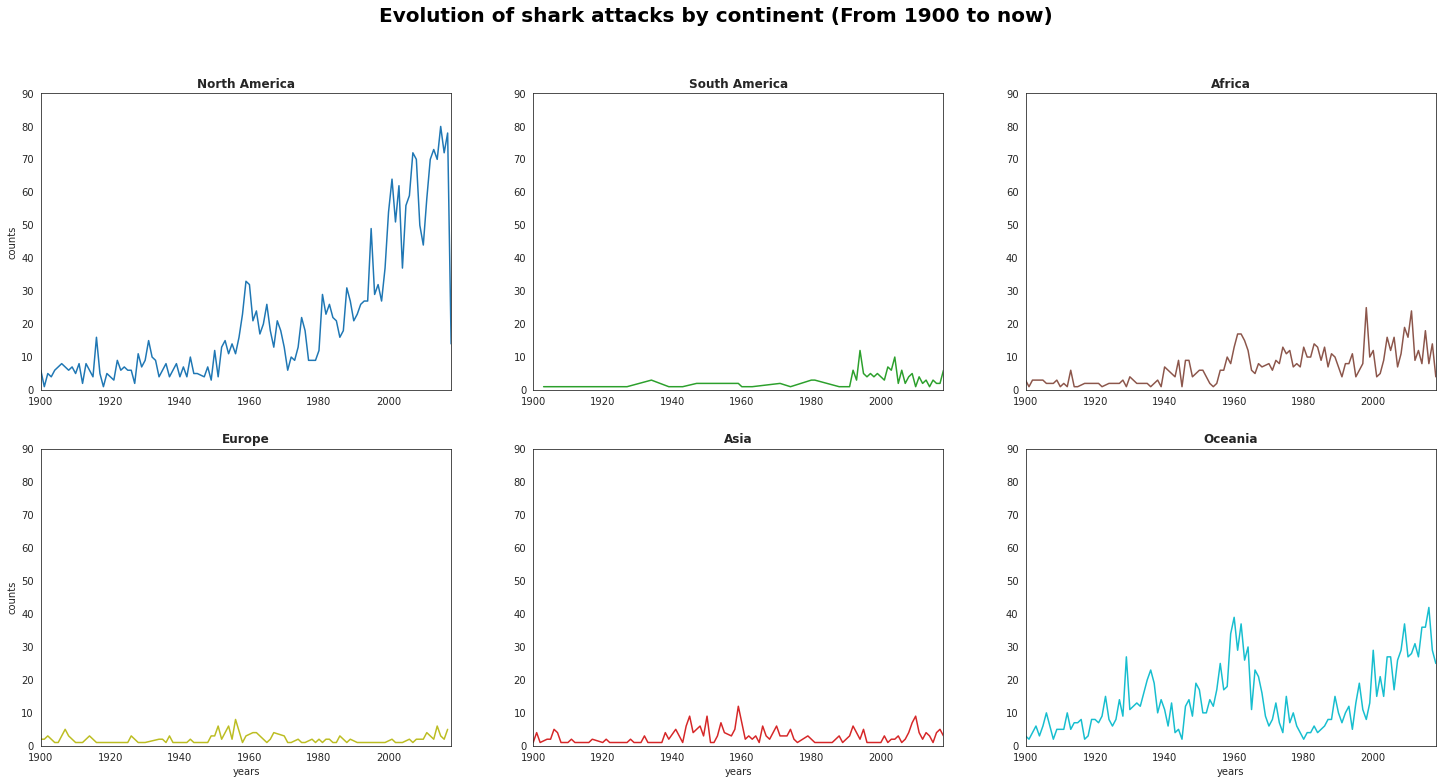

In [69]:
f = plt.figure(figsize=(25, 12))
gs = f.add_gridspec(2, 3)
f.suptitle('Evolution of shark attacks by continent (From 1900 to now)', fontsize=20, fontweight='bold', c='k')

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(data=n_america[n_america['years'] >= 1900], x='years', y='counts', color='tab:blue').set_title('North America', fontweight='bold')
    ax.set(xlabel=None, ylim=(0,90), xlim=(1900,2018))
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sns.lineplot(data=s_america[s_america['years'] >= 1900], x='years', y='counts', color='tab:green').set_title('South America', fontweight='bold')
    ax.set(xlabel=None, ylabel=None, ylim=(0,90), xlim=(1900,2018))
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 2])
    sns.lineplot(data=africa[africa['years'] >= 1900], x='years', y='counts', color='tab:brown').set_title('Africa', fontweight='bold')
    ax.set(xlabel=None, ylabel=None, ylim=(0,90), xlim=(1900,2018))
with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 0])
    sns.lineplot(data=europe[europe['years'] >= 1900], x='years', y='counts', color='tab:olive').set_title('Europe', fontweight='bold')
    ax.set(ylim=(0,90), xlim=(1900,2018))
with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 1])
    sns.lineplot(data=asia[asia['years'] >= 1900], x='years', y='counts', color='tab:red').set_title('Asia', fontweight='bold')
    ax.set(ylabel=None, ylim=(0,90), xlim=(1900,2018))
with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 2])    
    sns.lineplot(data=oceania[oceania['years'] >= 1900], x='years', y='counts', color='tab:cyan').set_title('Oceania', fontweight='bold')
    ax.set(ylabel=None, ylim=(0,90), xlim=(1900,2018))

As the plots shown, the continents with the largest numbers of shark attacks notified are North America, Oceanía and Africa. The evolution of the lines are pretty similar up till 1980. Each of the continents has a peak around the 60's, which is higher for Oceania. After this peak, a valley comes, more pronounced for Oceania and North America, and more stable for Africa. At some point in the 80's, Africa gets the highest number of shark attacks notified, and it sways between the growth and stability afterwards.

The real growth after the 80's came for North America, which increases from 10 notified cases to 80 in 3 decades. Similar evolution, but with less intensity, for Oceania, which goes from around 3 cases to nearly 40 in the same period. 

The reminder 3 continents have much lower numbers, with similar peaks of around 10 cases for Europe and Asia in the 60's; and a similar peak for South America around the mid 90's.

Let's see now how is the evolution of cases along the year, month by month, by continent.

In [86]:
n_america = attacks_df[attacks_df['Continent'] == 'North America']['Month'].value_counts().rename_axis('months').reset_index(name='counts')
n_america['months'] = n_america['months'].astype(int)
n_america.sort_values(by=['months'], inplace=True)
n_america['months'] = n_america['months'].apply(lambda x: calendar.month_abbr[x])

s_america = attacks_df[attacks_df['Continent'] == 'South America']['Month'].value_counts().rename_axis('months').reset_index(name='counts')
s_america['months'] = s_america['months'].astype(int)
s_america.sort_values(by=['months'], inplace=True)
s_america['months'] = s_america['months'].apply(lambda x: calendar.month_abbr[x])

africa = attacks_df[attacks_df['Continent'] == 'Africa']['Month'].value_counts().rename_axis('months').reset_index(name='counts')
africa['months'] = africa['months'].astype(int)
africa.sort_values(by=['months'], inplace=True)
africa['months'] = africa['months'].apply(lambda x: calendar.month_abbr[x])

europe = attacks_df[attacks_df['Continent'] == 'Europe']['Month'].value_counts().rename_axis('months').reset_index(name='counts')
europe['months'] = europe['months'].astype(int)
europe.sort_values(by=['months'], inplace=True)
europe['months'] = europe['months'].apply(lambda x: calendar.month_abbr[x])

asia = attacks_df[attacks_df['Continent'] == 'Asia']['Month'].value_counts().rename_axis('months').reset_index(name='counts')
asia['months'] = asia['months'].astype(int)
asia.sort_values(by=['months'], inplace=True)
asia['months'] = asia['months'].apply(lambda x: calendar.month_abbr[x])

oceania = attacks_df[attacks_df['Continent'] == 'Oceania']['Month'].value_counts().rename_axis('months').reset_index(name='counts')
oceania['months'] = oceania['months'].astype(int)
oceania.sort_values(by=['months'], inplace=True)
oceania['months'] = oceania['months'].apply(lambda x: calendar.month_abbr[x])

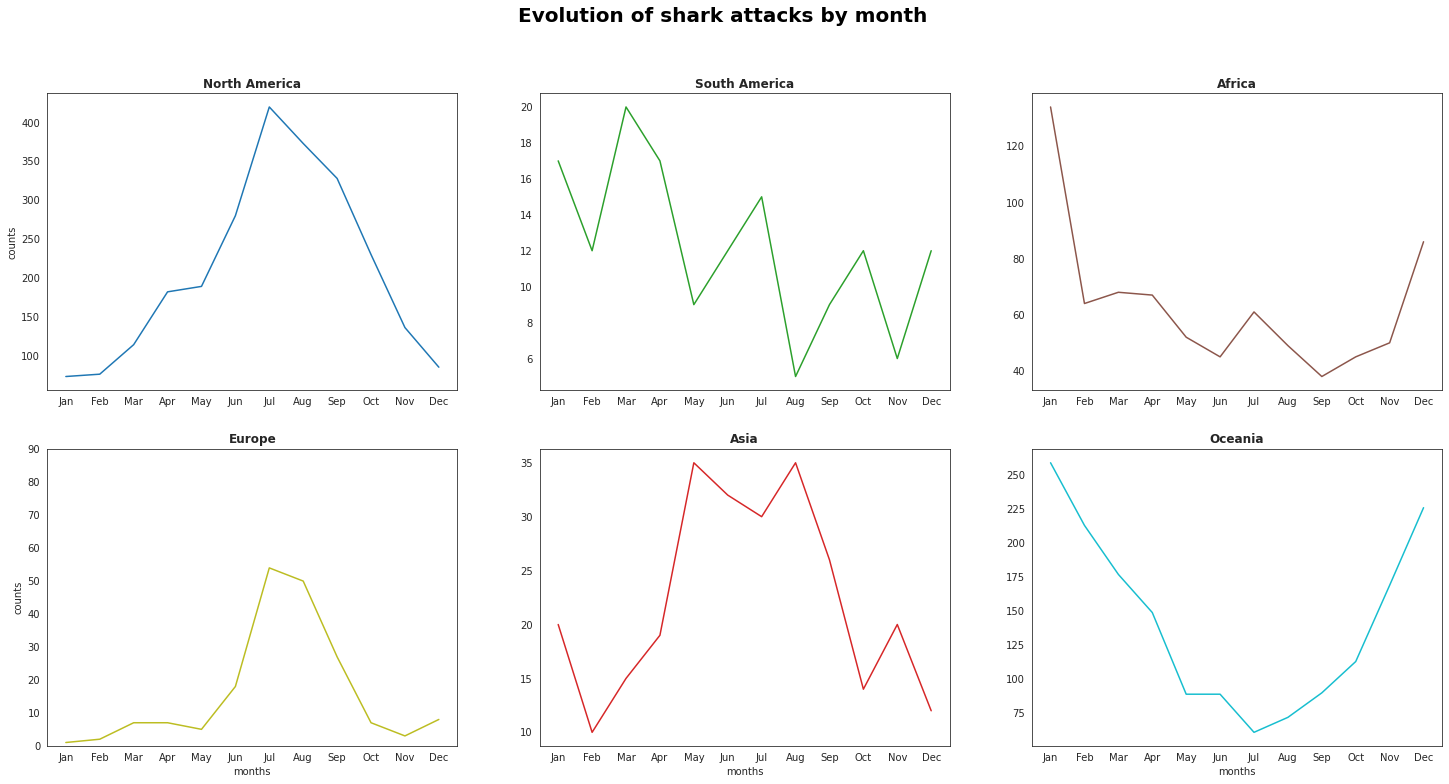

In [88]:
f = plt.figure(figsize=(25, 12))
gs = f.add_gridspec(2, 3)
f.suptitle('Evolution of shark attacks by month', fontsize=20, fontweight='bold', c='k')

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(data=n_america, x='months', y='counts', color='tab:blue').set_title('North America', fontweight='bold')
    ax.set(xlabel=None)
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sns.lineplot(data=s_america, x='months', y='counts', color='tab:green').set_title('South America', fontweight='bold')
    ax.set(xlabel=None, ylabel=None)
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 2])
    sns.lineplot(data=africa, x='months', y='counts', color='tab:brown').set_title('Africa', fontweight='bold')
    ax.set(xlabel=None, ylabel=None)
with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 0])
    sns.lineplot(data=europe, x='months', y='counts', color='tab:olive').set_title('Europe', fontweight='bold')
    ax.set(ylim=(0,90))
with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 1])
    sns.lineplot(data=asia, x='months', y='counts', color='tab:red').set_title('Asia', fontweight='bold')
    ax.set(ylabel=None)
with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 2])    
    sns.lineplot(data=oceania, x='months', y='counts', color='tab:cyan').set_title('Oceania', fontweight='bold')
    ax.set(ylabel=None)


No surpirses from this plots, as all the peaks match with the summer seasons in each of the continents: North America registers more than 400 cases in July, Europe around 60, and Asia 35 around May and August; whilst Africa and Oceania get the peaks in January and December: Oceania gets more than 250 and africa nearly 140. The line behaves stranger in South America, with a peak in March, and some intercalated periods of growth and decrease.

Let's check now on the distribution of ages and sex by continent.

<AxesSubplot:xlabel='Age', ylabel='Continent'>

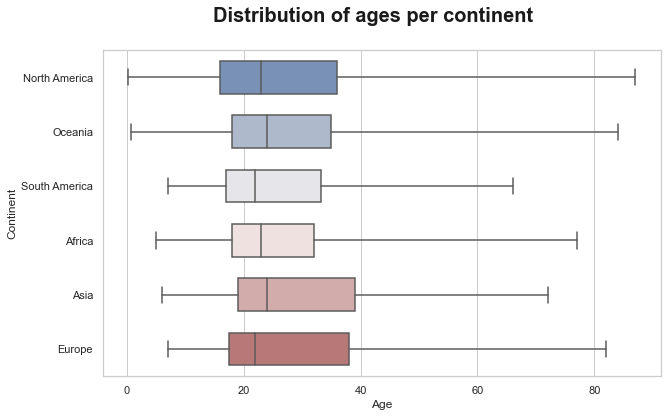

In [285]:
f, ax = plt.subplots(figsize=(10, 6))
f.suptitle('Distribution of ages per continent', fontsize=20, fontweight='bold', c='k')
sns.boxplot(x="Age", y="Continent", data=attacks_df, whis=[0, 100], width=.6, palette="vlag")


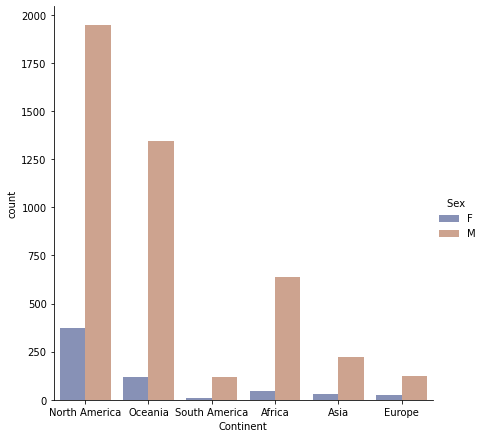

In [153]:
sns.catplot(data=attacks_df[attacks_df['Year'] >= 1900], kind="count", x="Continent", hue="Sex ", ci="sd", palette="dark", alpha=.5, height=6, ax=ax1)

As the top plot shows, the ranges of ages are pretty similar among the continents: wider for North America, Oceania (from 0 to 80) and Europe, and shorter for Asia and South America. Most of the cases comprehend the range between 20 years and 40 years old. I would like to highlight that the two middle quartiles in North America begin at nearly 16-17 years old; and the ones in Asia finish at nearly 40 years old. This could happen due to a kind of turism where water-sports are really typical. Europe's quartiles are the widest, while Africa's are the thinest.

About the sex distribution of the plot bottom plot, attacks with men involved are generally more numerous in each of the continents in comparison to attacks with women involved (around 80-20%).

Let's finish this general analysis checking on the distribution of activities (what people were doing when the attack took place) by continent.

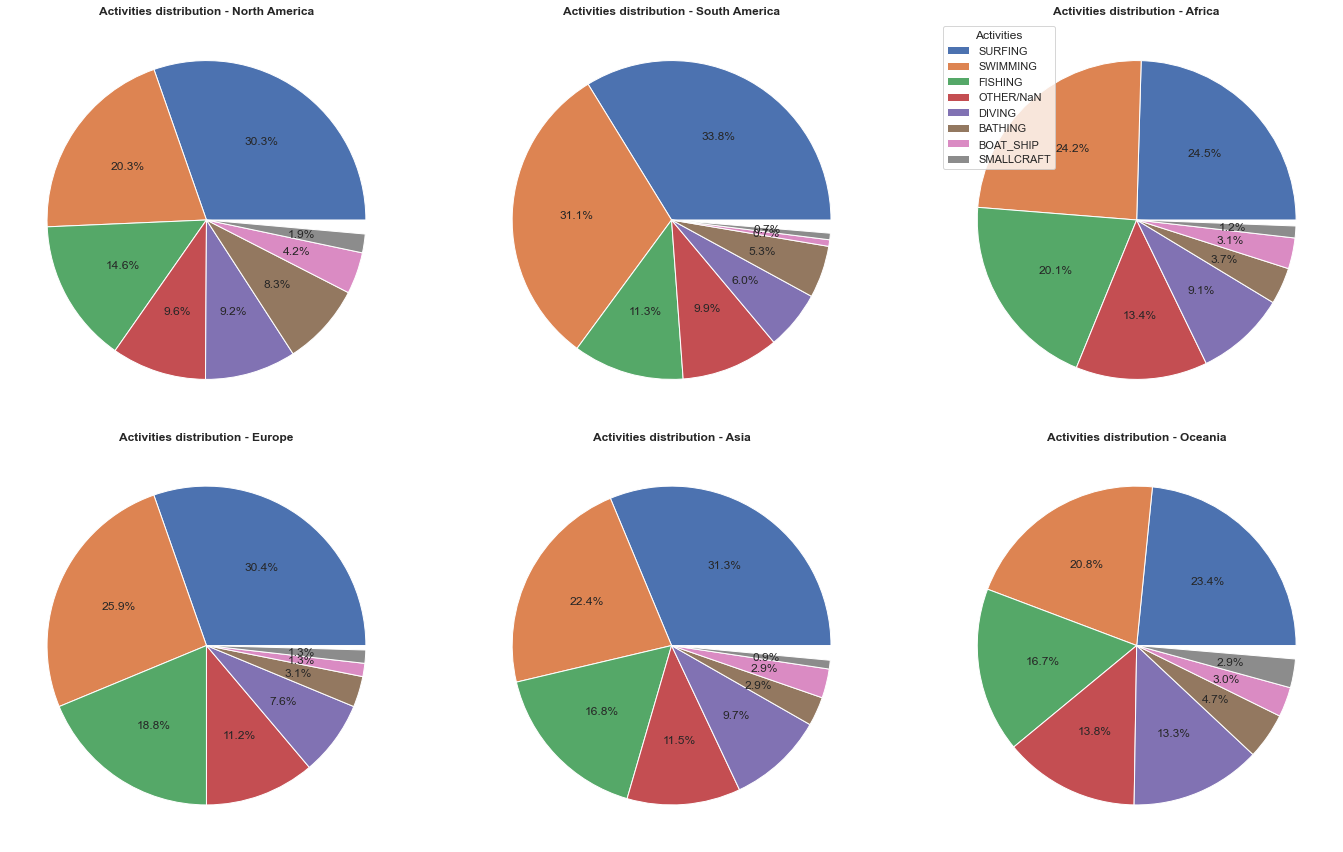

In [286]:
n_america = attacks_df[attacks_df['Continent'] == 'North America']['Activity'].value_counts(normalize=True).rename_axis('activity').reset_index(name='counts')
s_america = attacks_df[attacks_df['Continent'] == 'South America']['Activity'].value_counts(normalize=True).rename_axis('activity').reset_index(name='counts')
africa = attacks_df[attacks_df['Continent'] == 'Africa']['Activity'].value_counts(normalize=True).rename_axis('activity').reset_index(name='counts')
europe = attacks_df[attacks_df['Continent'] == 'Europe']['Activity'].value_counts(normalize=True).rename_axis('activity').reset_index(name='counts')
asia = attacks_df[attacks_df['Continent'] == 'Asia']['Activity'].value_counts(normalize=True).rename_axis('activity').reset_index(name='counts')
oceania = attacks_df[attacks_df['Continent'] == 'Oceania']['Activity'].value_counts(normalize=True).rename_axis('activity').reset_index(name='counts')

fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(2,3,1)
plt.pie(x=n_america['counts'][:8], autopct='%1.1f%%')
ax1.set_title('Activities distribution - North America', fontweight='bold')

ax2 = fig.add_subplot(2,3,2)
plt.pie(x=s_america['counts'][:8], autopct='%1.1f%%')
ax2.set_title('Activities distribution - South America', fontweight='bold')

ax3 = fig.add_subplot(2,3,3)
plt.pie(x=africa['counts'][:8], autopct='%1.1f%%')
ax3.legend(n_america['activity'], title='Activities', loc='upper left')
ax3.set_title('Activities distribution - Africa', fontweight='bold')

ax4 = fig.add_subplot(2,3,4)
plt.pie(x=europe['counts'][:8], autopct='%1.1f%%')
ax4.set_title('Activities distribution - Europe', fontweight='bold')

ax5 = fig.add_subplot(2,3,5)
plt.pie(x=asia['counts'][:8], autopct='%1.1f%%')
ax5.set_title('Activities distribution - Asia', fontweight='bold')

ax6 = fig.add_subplot(2,3,6)
plt.pie(x=oceania['counts'][:8], autopct='%1.1f%%')
ax6.set_title('Activities distribution - Oceania', fontweight='bold')
plt.tight_layout()

The top 3 activities for each of the continents are Surfing, Swimming and Fishing. No surprises on that anyway, but is really interesting how low is the portion of people who was performing some kind of diving when suffered the attack. 7.6 and 9.7% for Europe and Asia (where diving is a typical activity); or less than 10% for North America and Africa.

Is a bit higher in Oceania, where curiously, the portion of people surfing is lower than in any other continent.

## Fatalities since 1900

Once the general approach is done, is time to focuse the analysis in the number of fatalities produced by shark attacks. Let's start comparing this measure by continent.

### Fatalities/No fatalities by continent

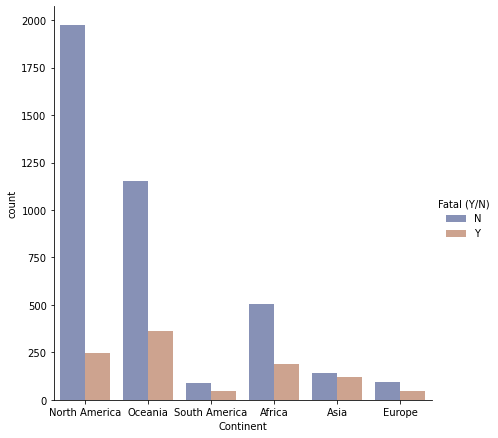

In [154]:
sns.catplot(data=attacks_df[attacks_df['Year'] >= 1900], kind="count", x="Continent", hue="Fatal (Y/N)", ci="sd", palette="dark", alpha=.5, height=6, ax=ax1)

Happily non of the continents has more fatalities than no-fatalities. The difference between this two measures is really big for North America (around 80-20%), Oceania and Africa (both around 70-30%). Nonetheless, on continents that usually have lower number of cases reported the difference between this two marks is more narrow: Asia could be around 55-45%, and South America around 60-40%. This means that even though there are less cases, those are much deadly.

### Fatalities/No fatalities by activity and type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'SURFING'),
  Text(1, 0, 'BATHING'),
  Text(2, 0, 'DIVING'),
  Text(3, 0, 'SWIMMING'),
  Text(4, 0, 'FISHING'),
  Text(5, 0, 'WORKING'),
  Text(6, 0, 'OTHER/NaN'),
  Text(7, 0, 'SMALLCRAFT'),
  Text(8, 0, 'BOAT_SHIP'),
  Text(9, 0, 'STRANGE_DUMB'),
  Text(10, 0, 'PLANE'),
  Text(11, 0, 'SPEARFISHING')])

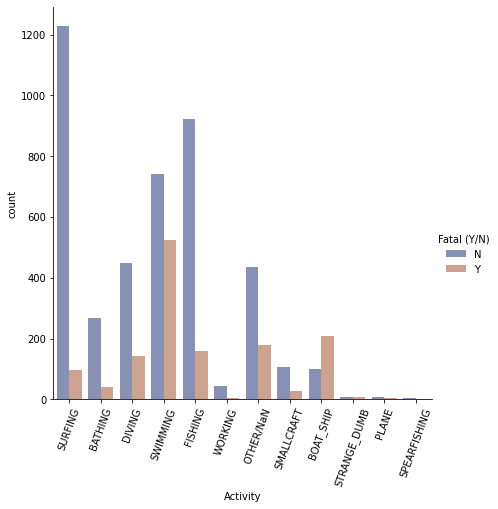

In [155]:
sns.catplot(data=attacks_df, kind="count", x="Activity", hue="Fatal (Y/N)", ci="sd", palette="dark", alpha=.5, height=6)
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'BOATING'),
  Text(1, 0, 'UNPROVOKED'),
  Text(2, 0, 'INVALID'),
  Text(3, 0, 'PROVOKED'),
  Text(4, 0, 'QUESTIONABLE'),
  Text(5, 0, 'SEA DISASTER')])

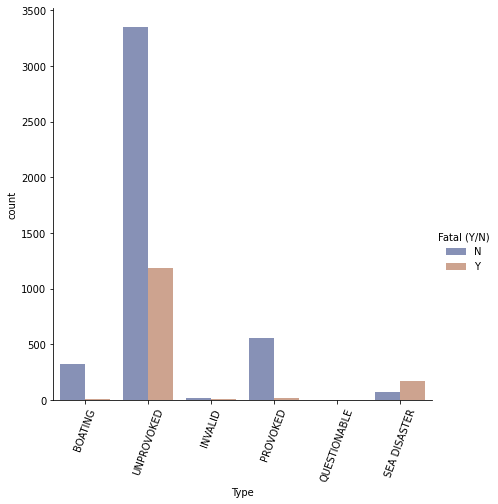

In [157]:
sns.catplot(data=attacks_df, kind="count", x="Type", hue="Fatal (Y/N)", ci="sd", palette="dark", alpha=.5, height=6)
plt.xticks(rotation=70)

As the plot shows, the deadliest activity by far is swimming, followed by sailing, fishing and diving. Unlike movies tend to tell us, surfers are kind of good avoiding shark attacks, or maybe the board really helps when fighting against this animals. It stands out the low number of people who dies while working (doing activities other than fishing) or spearfishing.

About the type of attack, the deadliest kinds of events are either unprovoked or related to a sea disaster, which means that people tend to avoid the confrontation with a shark or activities that could bring that up.

### Fatalities by year and continent

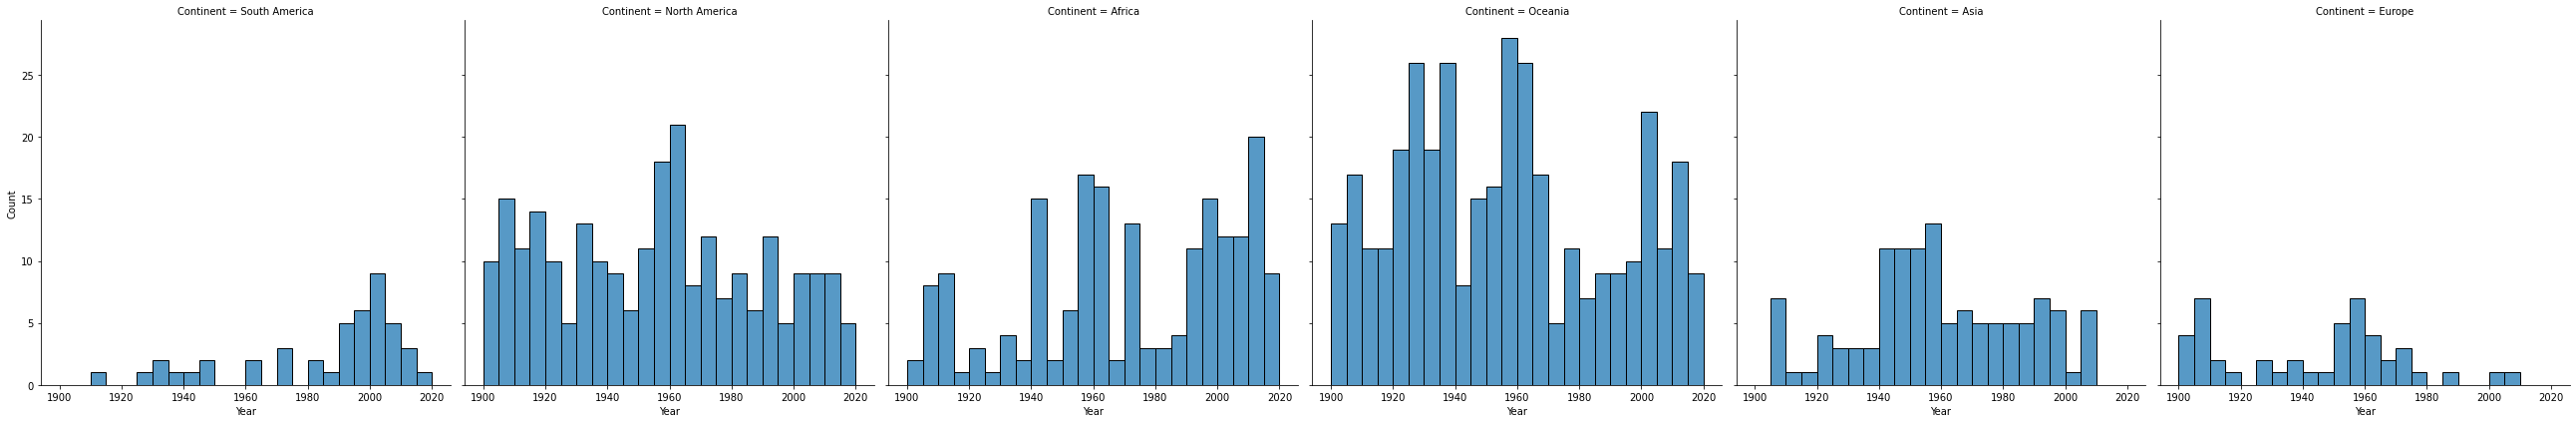

In [254]:
fatals = attacks_df[(attacks_df['Year'] >= 1900) & (attacks_df['Fatal (Y/N)'] == 'Y')]
sns.displot(fatals, x='Year', col='Continent', binwidth=5, height=6, facet_kws=dict(margin_titles=True))

The continent where more deaths by shark attack where registered along the last century is Oceania, with some really difficult decades around the 30's (maybe due to the migration movements) the 60's and around 2000. Is followed not too close by North Amreica, with a pronounced peak in the 60's, but a decline in the last decades. Opposite to that decline is Africa, were the death tool has been rising since the 80's, as it also had a peak in the 60's. 

Same peaks for Europe and Asia, but both have been more stable in this aspect on the last decades; and different in South America, where it happened around 2000.

### Fatalities by age

<AxesSubplot:xlabel='ages', ylabel='counts'>

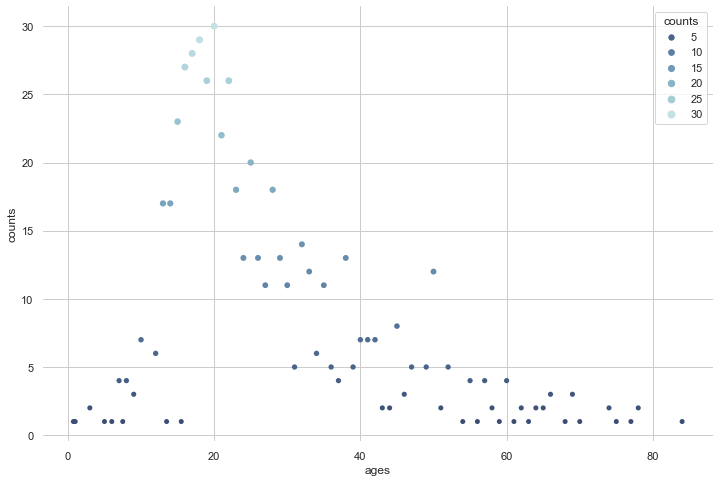

In [273]:
fatals_age = fatals['Age'].value_counts().rename_axis('ages').reset_index(name='counts')
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(data=fatals_age, x='ages', y='counts', hue="counts", size="counts", palette="ch:r=-.2,d=.3_r", hue_order=clarity_ranking, sizes=(25, 50), linewidth=0, ax=ax)

As the scatter shows, there is a positive relationship between age and fatalities (the older people is, the more deaths are registered for that age) up till the age of 20, where it gets a peak of 30 deaths. From there, the relationship turns negative, se we can say that from your 20's, the older you get, the less likely is for you to suffer a shark attack. 

### Distribution of fatalities by sex

Text(0.5, 1.0, 'Fatals distribution by sex')

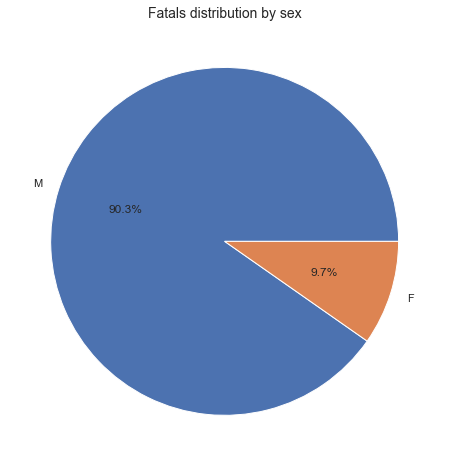

In [283]:
fatals_sex = fatals['Sex '].value_counts(normalize=True).rename_axis('sex').reset_index(name='counts')

f, ax = plt.subplots(figsize=(12, 8))
ax.pie(x=fatals_sex['counts'], labels=fatals_sex['sex'], autopct='%1.1f%%')
ax.set_title("Fatals distribution by sex", fontsize=14)

By last, the distribution of fatalities by sex shows us that 9 out of 10 fatal shark attacks are suffered by men. So we can conclude that the continent you are in, the activity you develop, your age and your sex could determine whether you live or die in case you suffer a shark attack. 